In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
from google.colab.patches import cv2_imshow #used to show images

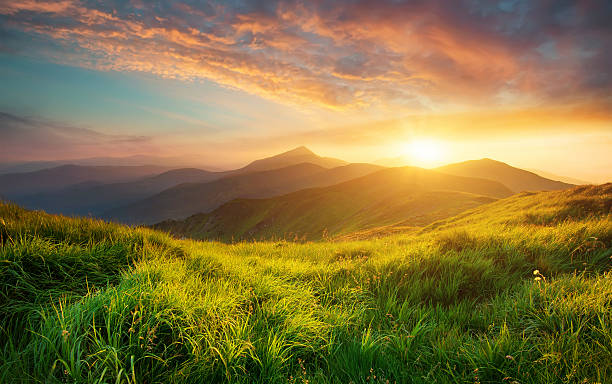

In [ ]:
Img = cv2.imread('drive/My Drive/img2_RSA.jpg')
cv2_imshow(Img)

In [ ]:
def power(x, y, p):

    ans = 1
     
    x = x % p
    while (y != 0):
         
        if (y % 2 ==1):
            ans = ((ans%p) * (x%p)) % p
 
        y=y//2
        x = ((x%p) * (x%p)) % p
     
    return ans

In [ ]:
import random

In [ ]:
def miillerTest(d, n):
     
    a = random.randint(1, n - 2)
 
    # Compute a^d % n
    x = power(a, d, n)
 
    if (x == 1 or x == n - 1):
        return True
 
    # Keep squaring x while one
    # of the following doesn't
    # happen
    # (i) d does not reach n-1
    # (ii) (x^2) % n is not 1
    # (iii) (x^2) % n is not n-1
    while (d != n - 1):
        x = ((x%n) * (x%n)) % n
        d *= 2
 
        if (x == 1):
            return False
        if (x == n - 1):
            return True
 
    # Return composite
    return False

In [ ]:
def isPrime( n, k):
     
    if (n <= 1 or n == 4):
        return False
    if (n <= 3):
        return True
 
    # Find r such that n = 2^d * r + 1 for some r >= 1
    d = n - 1
    while (d % 2 == 0):
        d //= 2
 
    for i in range(k):
        if (miillerTest(d, n) == False):
            return False
 
    return True

In [ ]:
def generatePrimeCandidate(length):
  # generate a random number with total number of bits as length
  p = random.getrandbits(length)
  # apply a mask to set MSB(Maximum Significant Bit) and LSB(Least Significant Bit) to 1
  # Set MSB to 1 to make sure we have a Number of 1024 bits.
  # Set LSB to 1 to make sure we get a Odd Number.
  p |= 1 << (length - 1) | 1   #equialent to p = p| 2**(length-1) | 1
  return p

In [ ]:
def gcd(a,b):
  if a==0:
    return b;
  return gcd(b%a,a)

In [ ]:
def generatePrime(length):
  A=4 #Starts with 4 and generate the prime number
  while not isPrime(A, 128):
        A = generatePrimeCandidate(length)
  return A

Find public key 'e'

In [ ]:
length=10
p=generatePrime(length)
q=generatePrime(length)
n=p*q
phi=(p-1)*(q-1)
e = generatePrime(5)
while gcd(e,phi)!=1:
  e = generatePrime(5)

For private Key 'd' we can use extended Euclid's Algorithm.

According to extended Euclid's Algorithm we have 𝑎𝑥+𝑏𝑦=gcd(𝑎,𝑏)

Take 𝑎=𝑒 and 𝑏=𝜑(𝑛)

We have gcd(𝑒,𝜑(𝑛))=1 by definition

So, 𝑒𝑥+𝜑(𝑛)𝑦=1

Taking this modulo 𝜑(𝑛) to get 𝑒𝑥≡1(mod𝜑(𝑛))

So we can see that x=d here. So we need to find 'x' by Euclid's Extended Algorithm

In [ ]:
def gcdExtended(a, b):
 
    # Base Case
    if a == 0:
        return b, 0, 1
 
    gcd, x1, y1 = gcdExtended(b % a, a)
 
    # Update x and y using results of recursive
    # call
    x = y1 - (b//a) * x1
    y = x1
 
    return gcd, x, y

In [ ]:
gcd, x, y = gcdExtended(e, phi)
if x>phi:
  x=x%phi
elif x<0:
  x=x+phi
d=x #d is the private key

In [ ]:
pixels = [[0 for x in range(3000)] for y in range(3000)]
height = Img.shape[0]
width = Img.shape[1]

# **Encryption**

$C = M^e mod(n)$

where M is the number which is to be encrypted, in our case it is RGB value
and C in the encrypted number

In [ ]:
for i in range(1,height):
  for j in range(1,width):
    r,g,b=Img[i,j]
    p1=power(r,e,n)
    p2=power(g,e,n)
    p3=power(b,e,n)
    pixels[i][j]=[p1,p2,p3]
    Img[i,j]=[p1,p2,p3]

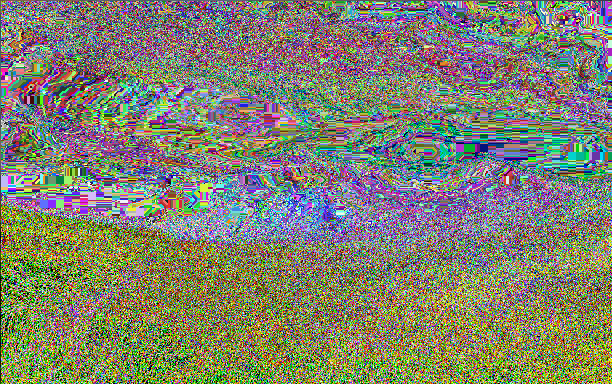

In [ ]:
cv2_imshow(Img)

# **Decyption**
$M = C^d mod(n)$

where C is the number which is to be decrypted and M in the decrypted number

In [ ]:
for i in range(1,height):
  for j in range(1,width):
    r,g,b=pixels[i][j]
    q1=power(r,d,n)
    q2=power(g,d,n)
    q3=power(b,d,n)
    Img[i,j]=[q1,q2,q3]

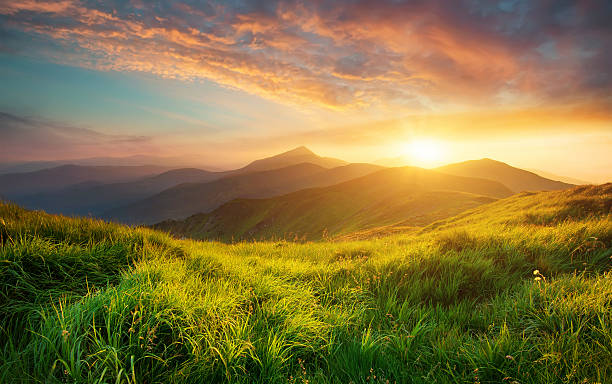

In [ ]:
cv2_imshow(Img)